In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset

    # Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature"
    
    # Read all tables
tables = pd.read_html(url)
    
    # We'll use the first table which usually contains the average temperature data
df = tables[0]
    
    # Display first few rows
print("Raw climate data loaded:")
print(df.head())

    



Raw climate data loaded:
   Country         City          Jan          Feb          Mar          Apr  \
0  Algeria      Algiers  11.2 (52.2)  11.5 (52.7)  13.6 (56.5)  15.6 (60.1)   
1  Algeria  Tamanrasset  12.8 (55.0)  15.0 (59.0)  18.1 (64.6)  22.2 (72.0)   
2  Algeria      Reggane  16.0 (60.8)  18.2 (64.8)  23.1 (73.6)  27.9 (82.2)   
3   Angola       Luanda  26.7 (80.1)  28.5 (83.3)  28.6 (83.5)  28.2 (82.8)   
4    Benin      Cotonou  27.3 (81.1)  28.5 (83.3)  28.9 (84.0)  28.6 (83.5)   

           May          Jun           Jul           Aug          Sep  \
0  18.8 (65.8)  22.6 (72.7)   25.7 (78.3)   26.6 (79.9)  23.9 (75.0)   
1  26.1 (79.0)  28.9 (84.0)   28.7 (83.7)   28.2 (82.8)  26.5 (79.7)   
2  32.2 (90.0)  36.4 (97.5)  39.8 (103.6)  38.4 (101.1)  35.5 (95.9)   
3  27.0 (80.6)  23.9 (75.0)   22.1 (71.8)   22.1 (71.8)  23.5 (74.3)   
4  27.8 (82.0)  26.5 (79.7)   25.8 (78.4)   25.6 (78.1)  26.0 (78.8)   

           Oct          Nov          Dec         Year Ref.  
0  20.

In [2]:
df.columns


Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.'],
      dtype='object')

In [7]:
df.drop(columns=['Ref.'], inplace=True)


In [8]:
import re

# Define the month columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year']

# Function to extract the Celsius value
def extract_celsius(val):
    if pd.isna(val):
        return None
    match = re.match(r"([+-]?\d+(\.\d+)?)", str(val))
    return float(match.group(1)) if match else None

# Apply to each temperature column
for col in months:
    df[col] = df[col].apply(extract_celsius)


In [9]:
print(df[['City', 'Country', 'Year']].head())
print(df.dtypes)


          City  Country  Year
0      Algiers  Algeria  18.2
1  Tamanrasset  Algeria  21.7
2      Reggane  Algeria  28.3
3       Luanda   Angola  25.8
4      Cotonou    Benin  27.2
Country     object
City        object
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
Jun        float64
Jul        float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
Year       float64
dtype: object


In [11]:
print(" Basic Statistics for Annual Average Temperatures:")
print(df['Year'].describe())


 Basic Statistics for Annual Average Temperatures:
count    111.000000
mean      23.968468
std        4.076272
min       11.400000
25%       21.050000
50%       25.200000
75%       26.900000
max       30.500000
Name: Year, dtype: float64


In [12]:
top_hot = df.sort_values(by='Year', ascending=False).head(10)
print("\n Top 10 Hottest Cities by Average Yearly Temperature:")
print(top_hot[['City', 'Country', 'Year']])



 Top 10 Hottest Cities by Average Yearly Temperature:
        City   Country  Year
30     Assab   Eritrea  30.5
82    Bosaso   Somalia  30.0
95  Khartoum     Sudan  29.9
24  Djibouti  Djibouti  29.9
61     Ségou      Mali  29.6
21    Abéché      Chad  29.4
48   Garissa     Kenya  29.3
71    Niamey     Niger  29.3
49    Lodwar     Kenya  29.3
76    Sokoto   Nigeria  28.9


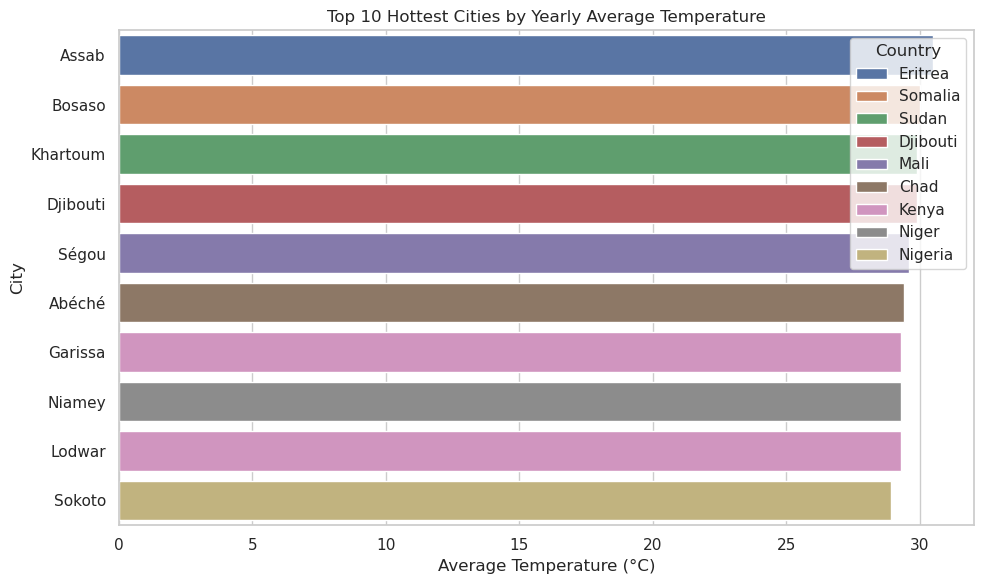

In [13]:
#Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(y='City', x='Year', data=top_hot, hue='Country', dodge=False)
plt.title('Top 10 Hottest Cities by Yearly Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


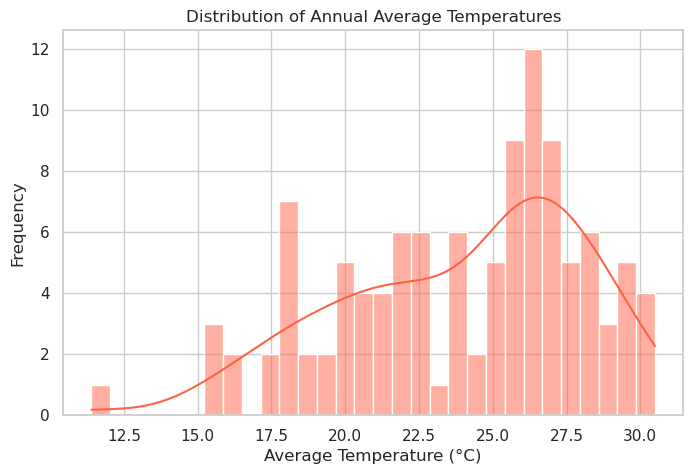

In [14]:
#Temperature distribution using Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Year'], bins=30, kde=True, color='tomato')
plt.title('Distribution of Annual Average Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


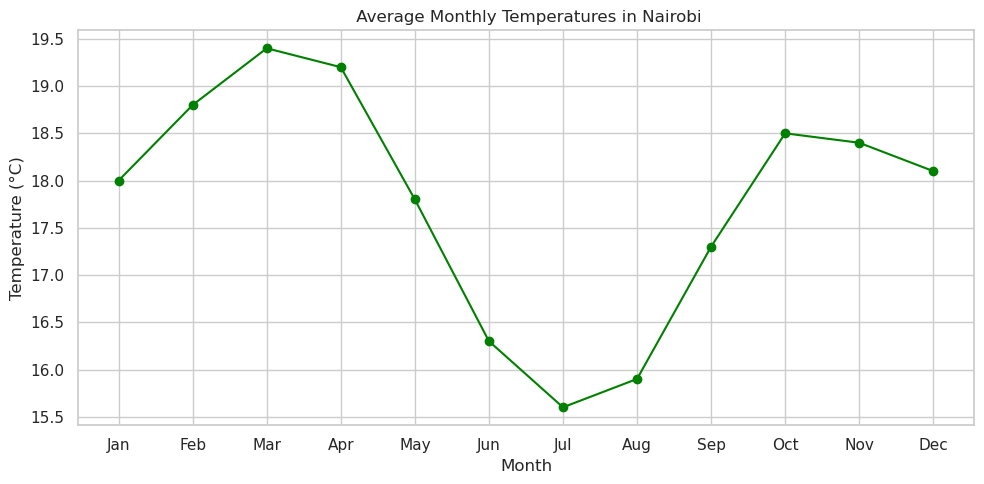

In [16]:
#Monthly temperature trnd for Nairobi
city_name = 'Nairobi'
if city_name in df['City'].values:
    city_data = df[df['City'] == city_name].iloc[0]
    plt.figure(figsize=(10, 5))
    plt.plot(months[:-1], city_data[months[:-1]], marker='o', color='green')
    plt.title(f' Average Monthly Temperatures in {city_name}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"City {city_name} not found in dataset.")


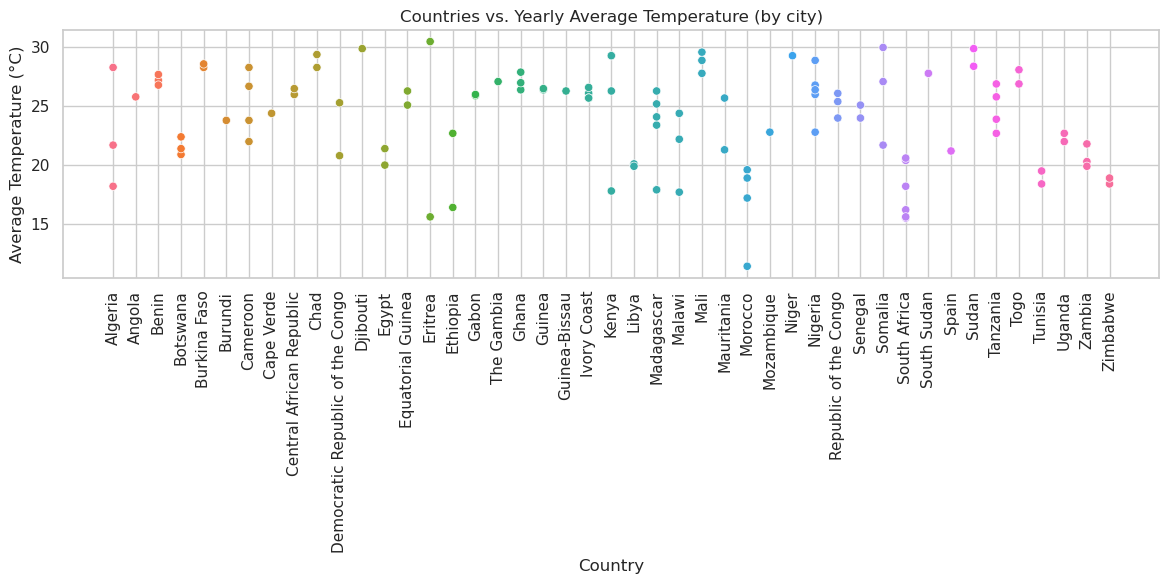

In [17]:
#Scatter country vs yearly avg temperature by city
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Country', y='Year', hue='Country', legend=False)
plt.title('Countries vs. Yearly Average Temperature (by city)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()


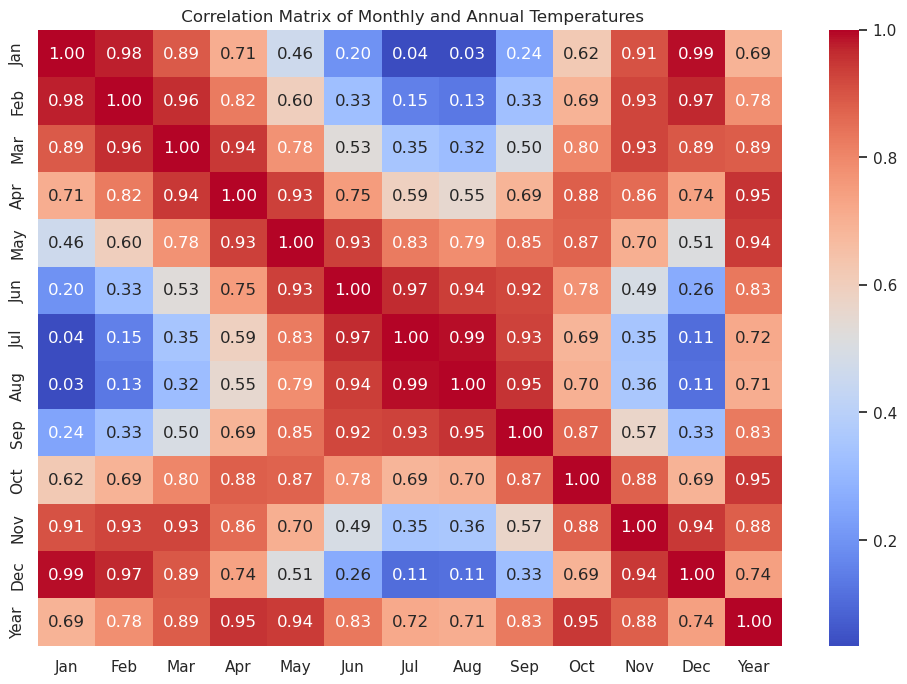

In [18]:
# Compute correlation matrix for months and annual average
corr_matrix = df[months].corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Correlation Matrix of Monthly and Annual Temperatures')
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(



Sample cities from each cluster:
           City       Country
0       Algiers       Algeria
1   Tamanrasset       Algeria
2       Reggane       Algeria
3        Luanda        Angola
4       Cotonou         Benin
5       Parakou         Benin
6         Kandi         Benin
7          Maun      Botswana
8      Gaborone      Botswana
9        Ghanzi      Botswana
10  Ouagadougou  Burkina Faso
25        Cairo         Egypt


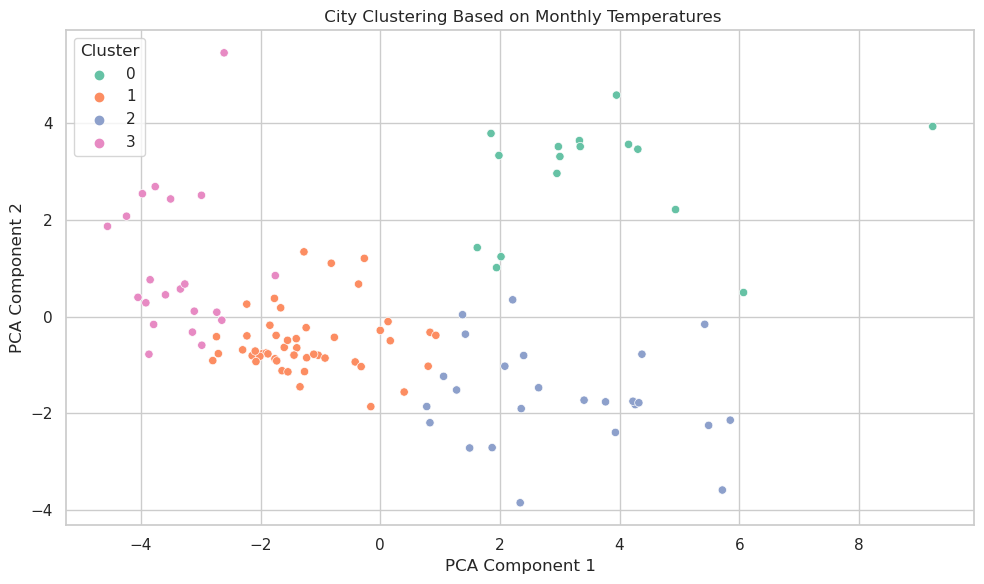

In [19]:
#Clustering Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only temperature columns for clustering
X = df[months[:-1]]  # exclude 'Year'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans (choose 4 clusters for illustration)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show sample from each cluster
print("\nSample cities from each cluster:")
print(df.groupby('Cluster')[['City', 'Country']].head(3))

# Visualize clusters using PCA (for 2D plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Cluster'], palette='Set2')
plt.title(' City Clustering Based on Monthly Temperatures')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
